### Probabilistic Biostatistics Examples
Code snippets to reproduce examples in the paper and presentation

#### Example from Section 3. Bayesian adaptive trial design and sequential analysis

In [1]:
using CSV

In [3]:
# CAMS data for Treatment and Placebo
df1 = CSV.read("jcp1.csv")
df4 = CSV.read("jcp2.csv")
wk121 = df1.wk121;
wk124 = df4.wk124;

In [5]:
using Plots, Distributions, BayesTesting

n    odds   prob<0     p-value
18   1.36   0.2355    0.471
36   1.19   0.2864    0.5729
54   3.42   0.0635    0.127
72   63.26   0.0022    0.0045
90   457.26   0.0003    0.0006
108   1033.2   0.0001    0.0003
126   308.16   0.0005    0.0009
144   662.87   0.0002    0.0004
162   2787.09   0.0    0.0
180   7679.35   0.0    0.0001
198   5.0e6   0.0    0.0


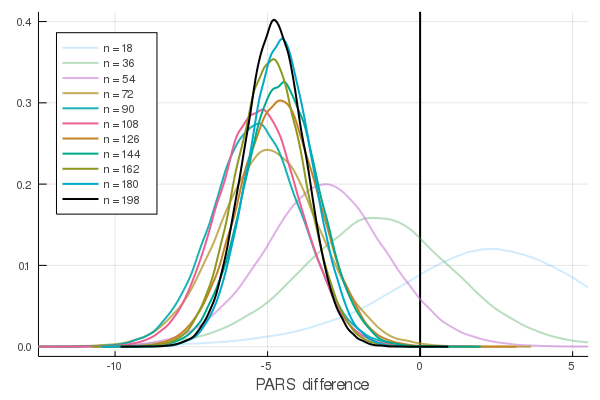

In [8]:
M = 100000
### Proceedings Figure 1 and Table 1:
plt1 = plot()
println("n    odds   prob<0     p-value")
for i = 6:6:66
    q = i*2      #### need 2:1 ratio of treated to PCBO
    m1 = mean(wk121[1:q]); sd1 = std(wk121[1:q])    # group 1 Treatment
    m4 = mean(wk124[1:i]); sd4 = std(wk124[1:i])    # group 4 Placebo
    # Distn. of means with draws from analytical posterior t-distributiion
    # Can use MCMC instead here from conditional posteriors,
    # equations (3) and (4).
    t1draw = m1 .+ (sd1/sqrt(q)).*rand(TDist(q-1),M)
    t4draw = m4 .+ (sd4/sqrt(i)).*rand(TDist(i-1),M)
    dift1t4 = t1draw - t4draw      # Treatment vs. Placebo
#    @show(round.(post_odds_pval(dift1t4),digits=4))
    # od, p_val, pval_2 = post_odds_pval(dift1t4)
    od = mcodds(dift1t4)
    p_val, pval_2 = bayespval(dift1t4)
    odds = round(od,digits=2)
    pval2 = round(pval_2,digits=4)
    pval = round(p_val,digits=4)
    println(3*i,"   ",odds,"   ",pval,"    ",pval2)

    if i == 6
        plt1 = plot(dift1t4, st=:density, alpha=(i*0.02*3/2),linewidth=2, xlims=[-12.0,5.0],ylims=[0.0,0.4],label="n = $(3*i)", xlabel="PARS difference",legend=:topleft)
        vline!([0.0],linewidth=2,linecolor=:black,label="")
    elseif i < 66
        plot!(dift1t4, st=:density, alpha=(i*0.02*3/2), linewidth=2,label="n = $(3*i)")
    else
        plot!(dift1t4, st=:density, alpha=1.2, linewidth=2,linecolor=:black,label="n = $(3*i)")
    end
end
current()